In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')  

df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [2]:
df.shape

(1000, 16)

In [16]:
print(df.columns.tolist())

['Series_Title', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'No_of_Votes', 'Gross']


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series_Title  1000 non-null   object 
 1   Certificate   899 non-null    object 
 2   Runtime       1000 non-null   object 
 3   Genre         1000 non-null   object 
 4   IMDB_Rating   1000 non-null   float64
 5   Meta_score    843 non-null    float64
 6   Director      1000 non-null   object 
 7   Star1         1000 non-null   object 
 8   Star2         1000 non-null   object 
 9   Star3         1000 non-null   object 
 10  No_of_Votes   1000 non-null   int64  
 11  Gross         831 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [19]:
print(df.isnull().sum())

Series_Title      0
Certificate     101
Runtime           0
Genre             0
IMDB_Rating       0
Meta_score      157
Director          0
Star1             0
Star2             0
Star3             0
No_of_Votes       0
Gross           169
dtype: int64


In [31]:
df = df.drop_duplicates()
df.head()

,Series_Title,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,No_of_Votes,Gross
0,The Shawshank Redemption,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,2343110,"28,341,469"
1,The Godfather,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,1620367,"134,966,411"
2,The Dark Knight,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,2303232,"534,858,444"
3,The Godfather: Part II,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,1129952,"57,300,000"
4,12 Angry Men,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,689845,"4,360,000"


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


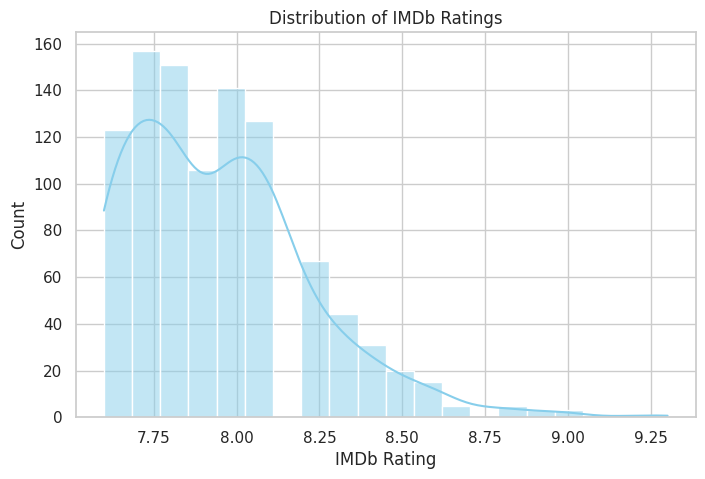

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()



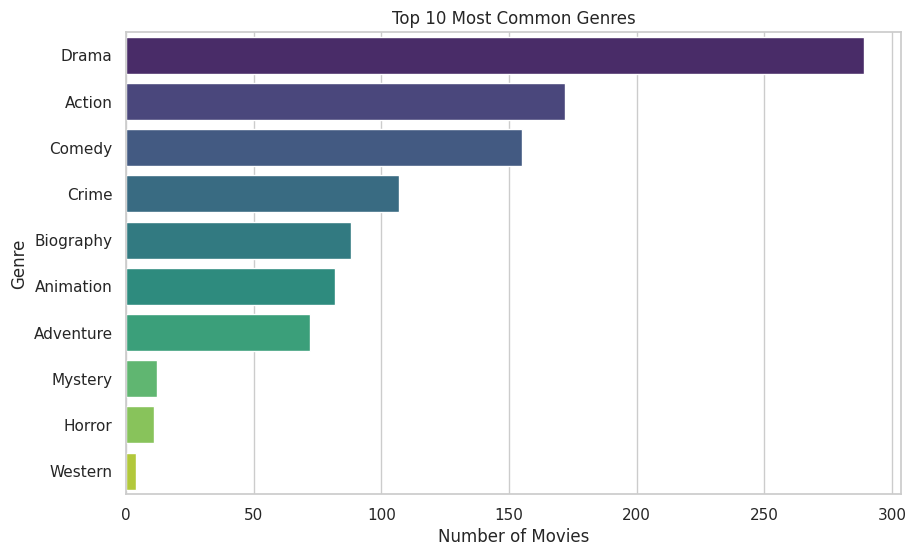

In [35]:
df['Main_Genre'] = df['Genre'].str.split(',').str[0]

genre_counts = df['Main_Genre'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


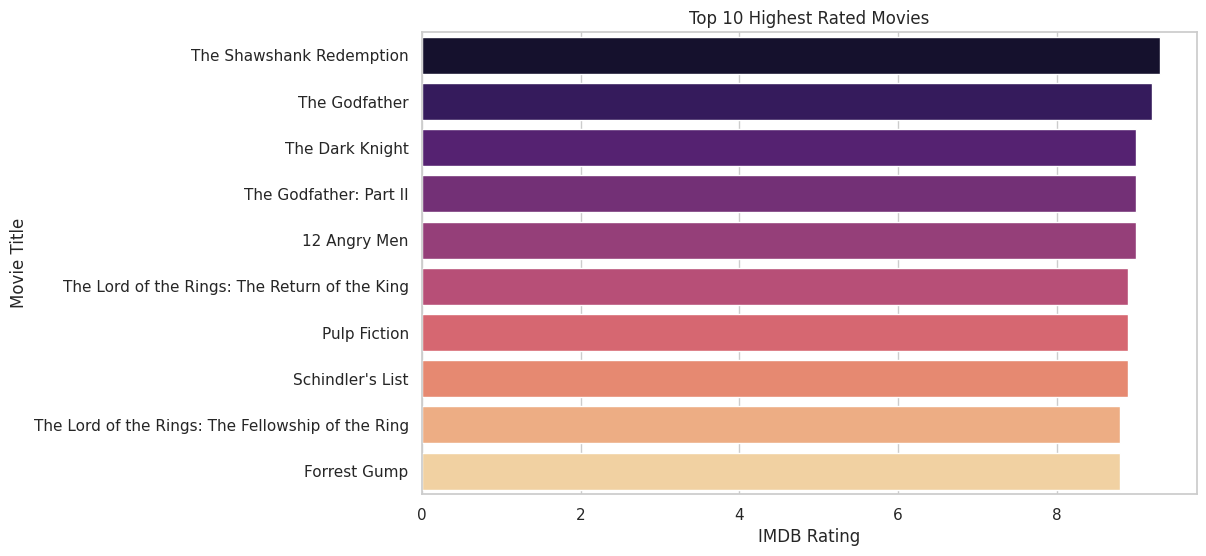

In [36]:
top10 = df[['Series_Title', 'IMDB_Rating']].sort_values(by='IMDB_Rating', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='IMDB_Rating', y='Series_Title', data=top10, palette='magma')
plt.title('Top 10 Highest Rated Movies')
plt.xlabel('IMDB Rating')
plt.ylabel('Movie Title')
plt.show()


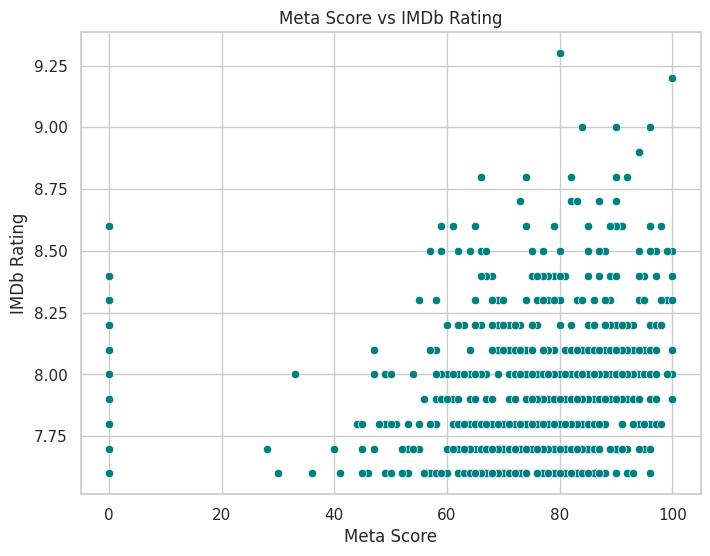

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Meta_score', y='IMDB_Rating', data=df, color='teal')
plt.title('Meta Score vs IMDb Rating')
plt.xlabel('Meta Score')
plt.ylabel('IMDb Rating')
plt.show()


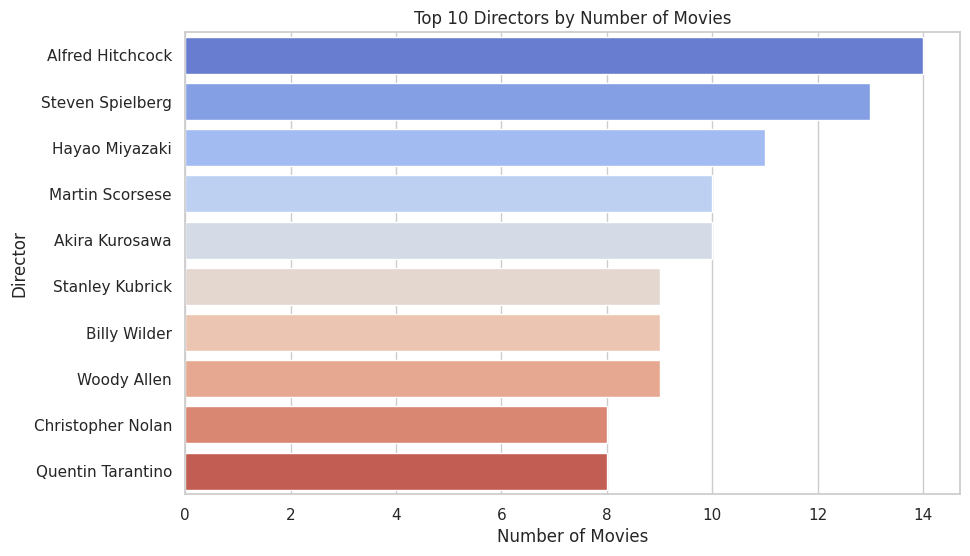

In [39]:
top_directors = df['Director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


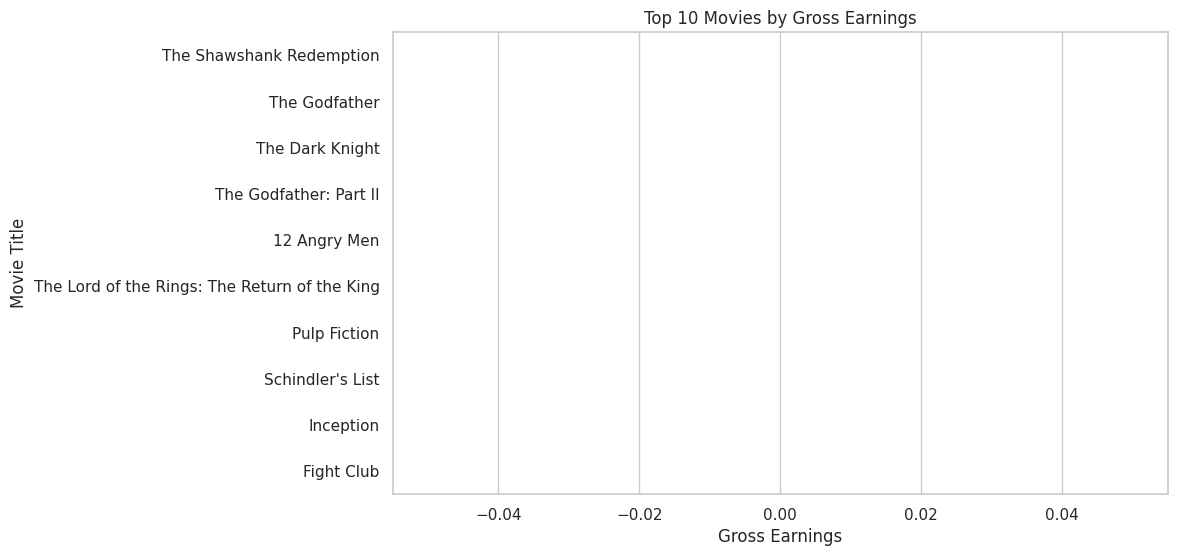

In [40]:
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

top10_gross = df[['Series_Title', 'Gross']].sort_values(by='Gross', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Gross', y='Series_Title', data=top10_gross, palette='plasma')
plt.title('Top 10 Movies by Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Movie Title')
plt.show()


**Introduction**

This project analyzes the IMDb Top 1000 movies and TV shows dataset. The goal is to explore trends in movie ratings, genres, directors, and box office gross to gain insights into the entertainment industry.


**Dataset Description**

The dataset contains information on 1000 popular movies and TV shows, including:

- Title  
- Genre  
- Release Year  
- IMDb Rating  
- Meta Score  
- Director  
- Runtime  
- Gross Earnings


In [43]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv') 

df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


**Exploratory Data Analysis (EDA)**

- Distribution of IMDb ratings.
- Most common genres.
- Top-rated movies.
- Correlation between Meta Score and IMDb Rating.
- Top directors by number of movies.
- Highest grossing movies.


**Exploratory Data Analysis**

Here we explore the distribution of movie ratings over the years.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


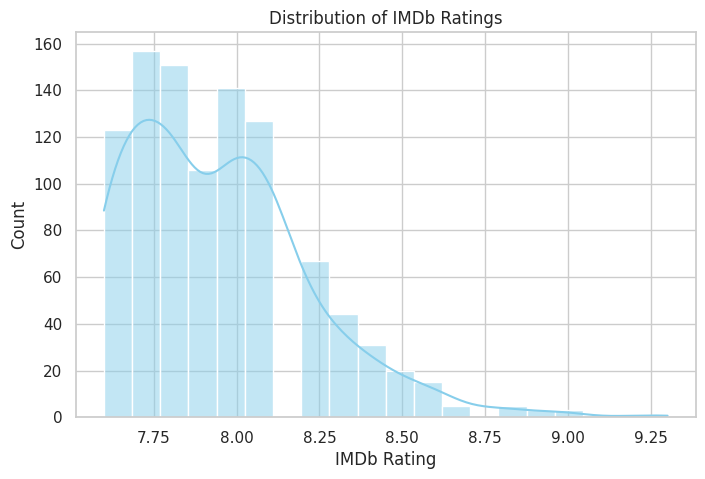

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()


**Exploratory Data Analysis**

Here we explore the Top 10 most common Genres over the years.

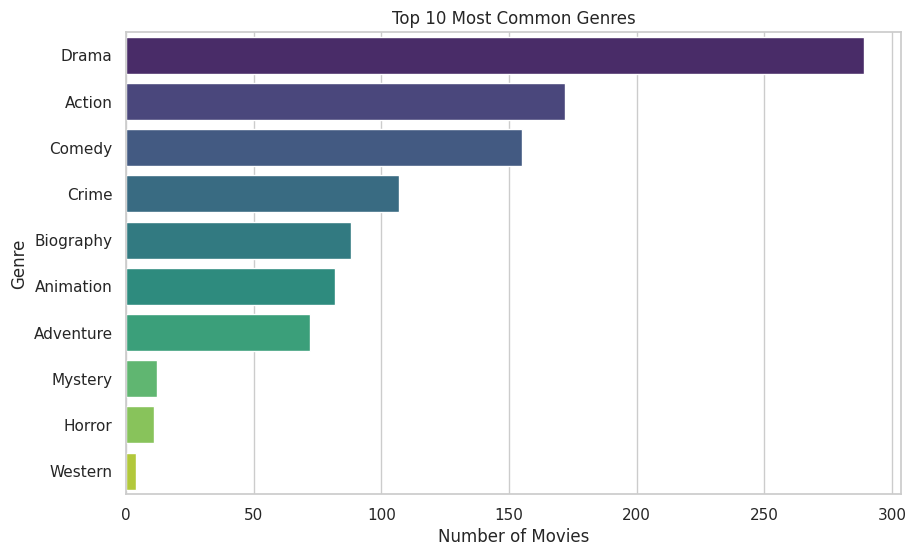

In [45]:
df['Main_Genre'] = df['Genre'].str.split(',').str[0]


genre_counts = df['Main_Genre'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

**Exploratory Data Analysis**

Here we explore the Top 10 highest rating movies over the years.

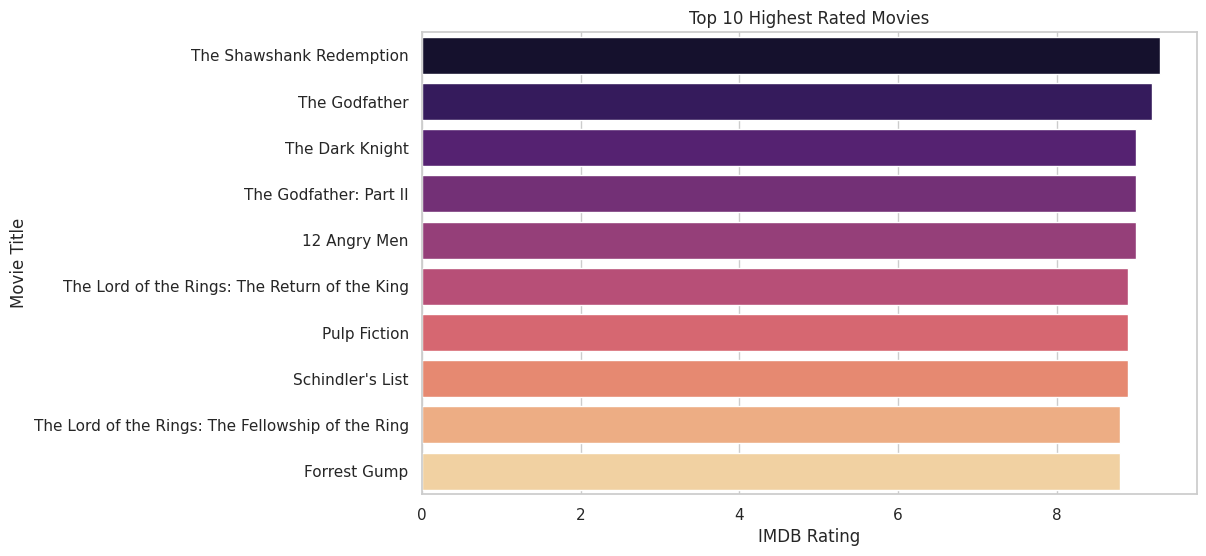

In [46]:
top10 = df[['Series_Title', 'IMDB_Rating']].sort_values(by='IMDB_Rating', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='IMDB_Rating', y='Series_Title', data=top10, palette='magma')
plt.title('Top 10 Highest Rated Movies')
plt.xlabel('IMDB Rating')
plt.ylabel('Movie Title')
plt.show()

**Exploratory Data Analysis**

Here we explore the meta score and imdb ratings over the years.

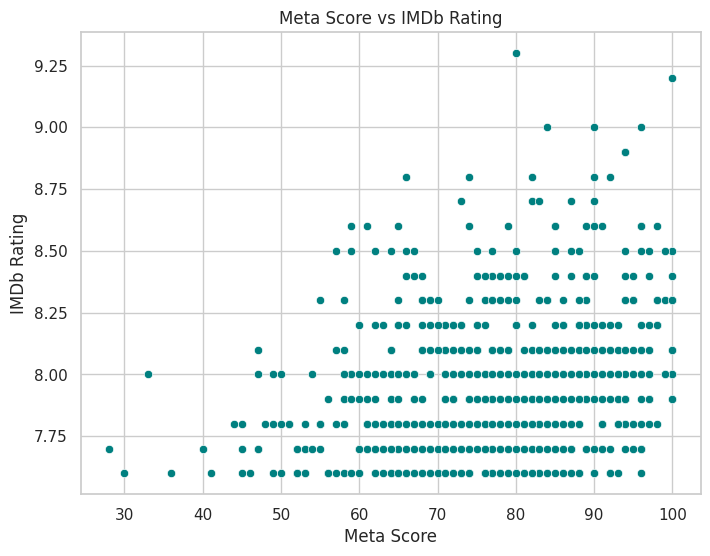

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Meta_score', y='IMDB_Rating', data=df, color='teal')
plt.title('Meta Score vs IMDb Rating')
plt.xlabel('Meta Score')
plt.ylabel('IMDb Rating')
plt.show()

**Exploratory Data Analysis**

Here we explore the Top 10 directors by number of movies over the years.

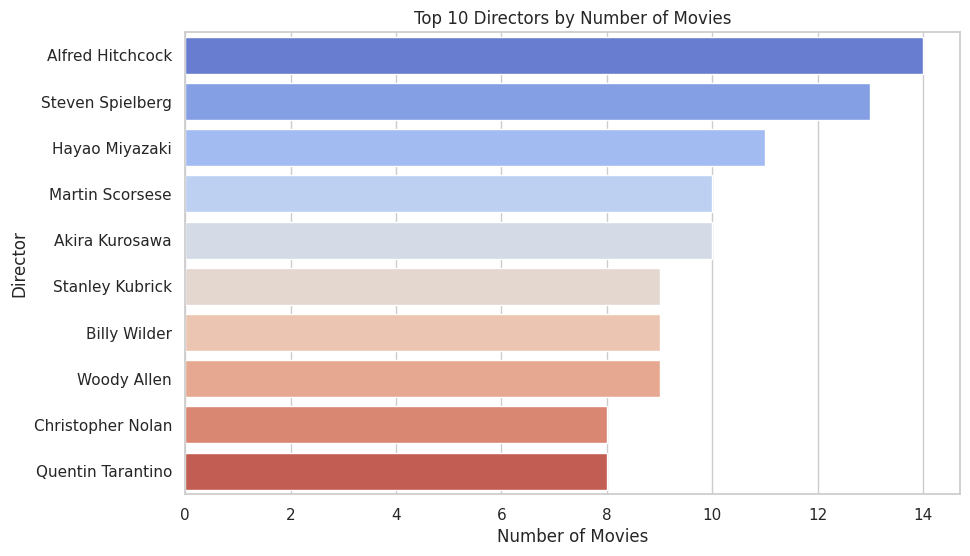

In [48]:
top_directors = df['Director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


**Exploratory Data Analysis**

Here we explore the Top 10 movies by gross earnings over the years.

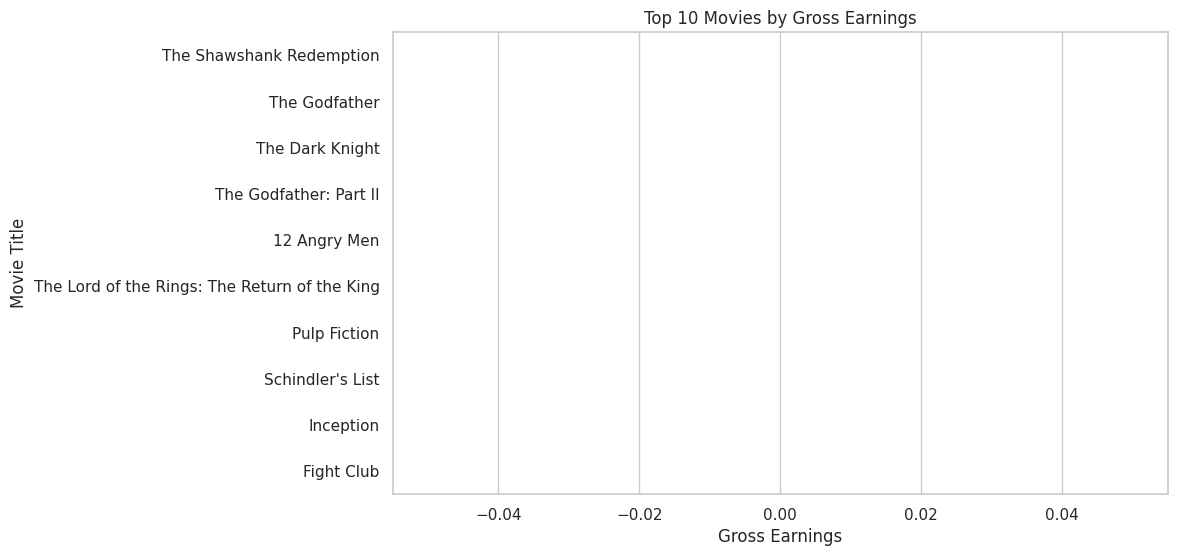

In [49]:
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')


top10_gross = df[['Series_Title', 'Gross']].sort_values(by='Gross', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Gross', y='Series_Title', data=top10_gross, palette='plasma')
plt.title('Top 10 Movies by Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Movie Title')
plt.show()

**Summary of Insights**

- The most popular genres are Drama, Action, and Comedy
- IMDb ratings are generally stable over the years.
- Positive correlation exists between Meta Score and IMDb Rating.
- Top directors have multiple entries in the dataset.
- High gross earnings mostly align with higher IMDb ratings.


**Conclusions and Recommendations**

- Focus on popular genres like Drama and Action for greater audience appeal.
- Maintain quality to satisfy both critics and audiences.
- Further analysis could explore marketing impact on box office success.
